In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN#Balances the Dataset: It generates synthetic data points for the minority class to reduce class imbalance (Adaptive Synthetic Sampling)
import pickle

In [ ]:
file_path = pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
file_path.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
file_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
#checking the rows and columns
file_path.shape

(309, 16)

In [ ]:
#checking the duplicate
file_path.duplicated().sum()


33

In [ ]:
file_path.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
file_path.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
#convertion of data into label of 0 and 1
le = LabelEncoder()
column = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
          'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
          'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
          'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

new_file = (file_path[column].apply(le.fit_transform))

In [ ]:
new_file.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,31,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,16,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,20,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,20,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
file_path.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
new_file.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

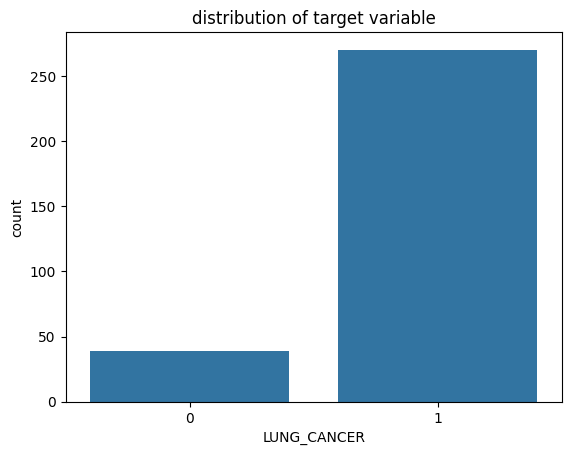

In [ ]:
#let check the distribution of target variable
sns .countplot(x ='LUNG_CANCER',data = new_file,)
plt.title('distribution of target variable')
plt.show()

In [ ]:
new_file['LUNG_CANCER'].value_counts()# the data is highly unbalance

,count
LUNG_CANCER,
1,270
0,39


In [ ]:
#function fro ploting
def plot(column, new_file=new_file):
    return new_file.groupby(column)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

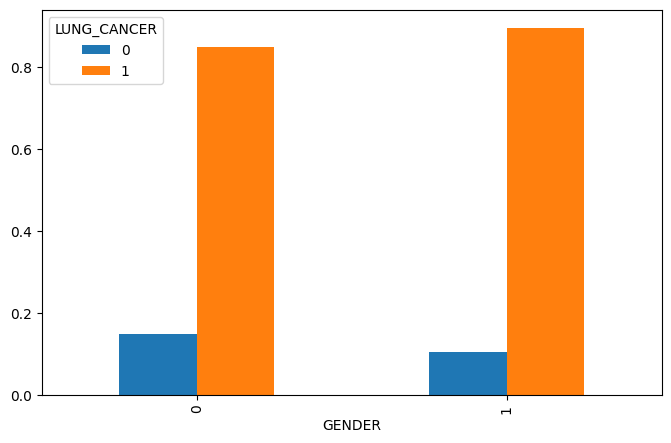

In [ ]:
plot('GENDER')

<Axes: xlabel='AGE'>

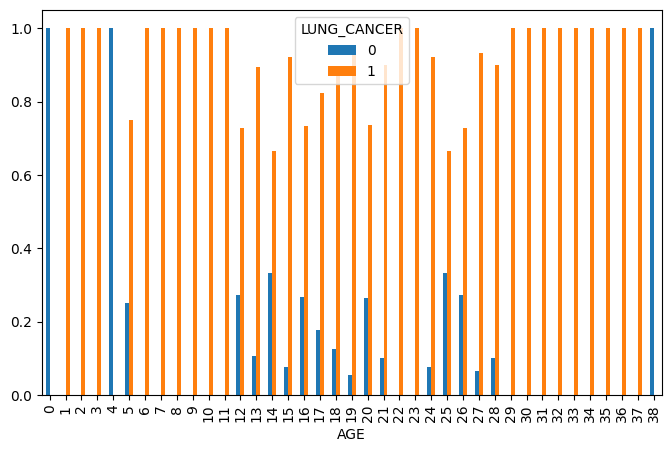

In [ ]:
plot('AGE')

<Axes: xlabel='SMOKING'>

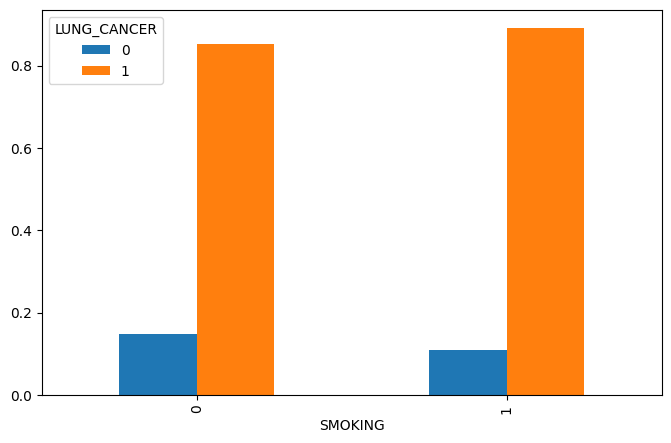

In [ ]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

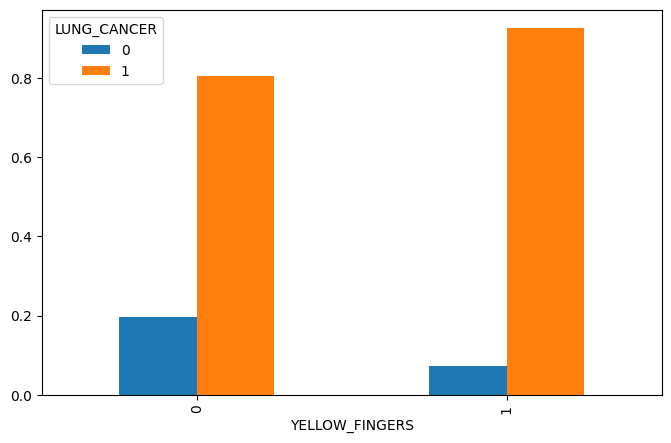

In [ ]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

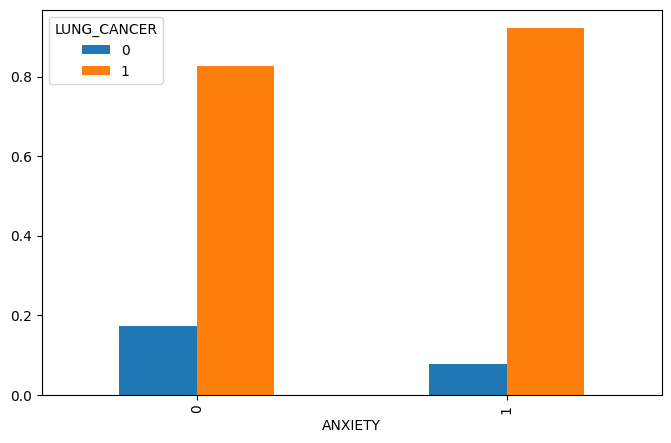

In [ ]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

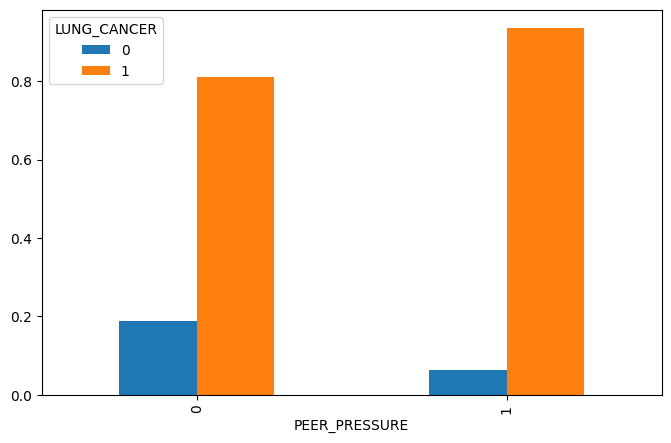

In [ ]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

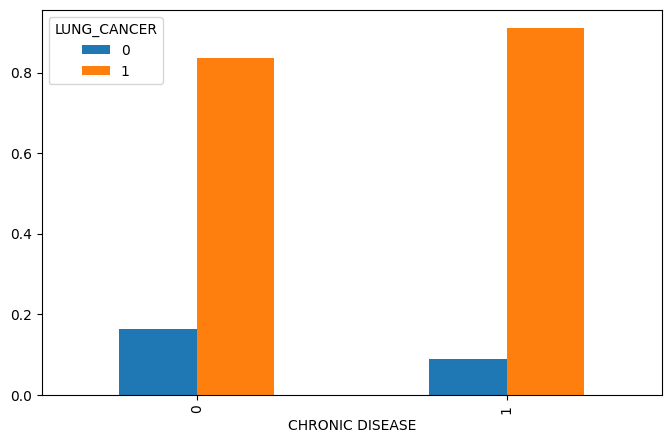

In [ ]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

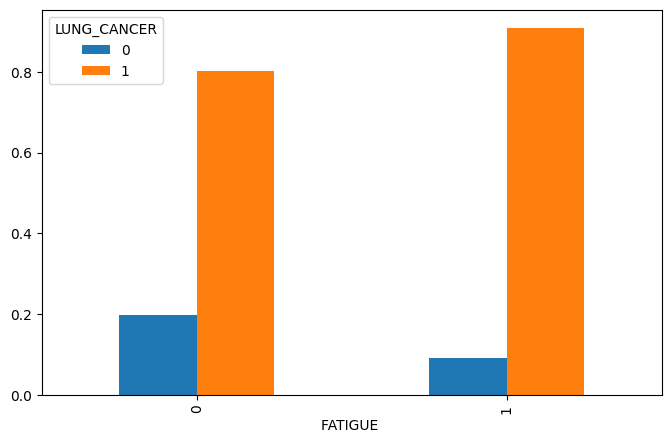

In [ ]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

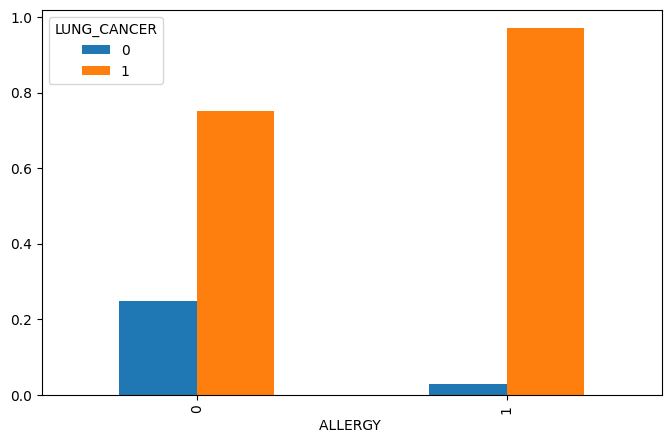

In [ ]:
plot('ALLERGY ')

<Axes: xlabel='WHEEZING'>

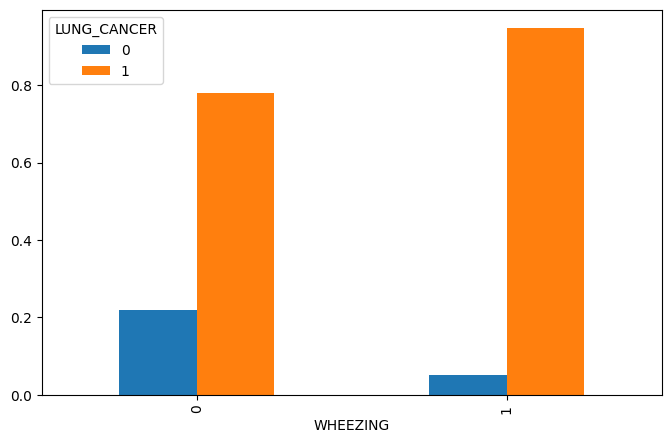

In [ ]:
plot('WHEEZING')

<Axes: xlabel='ALCOHOL CONSUMING'>

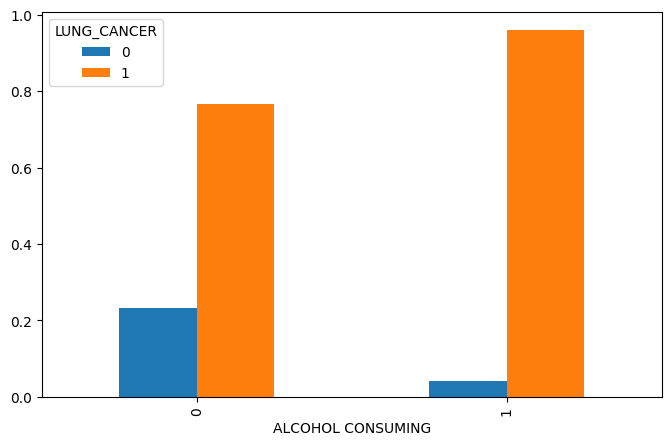

In [ ]:
plot('ALCOHOL CONSUMING')

<Axes: xlabel='COUGHING'>

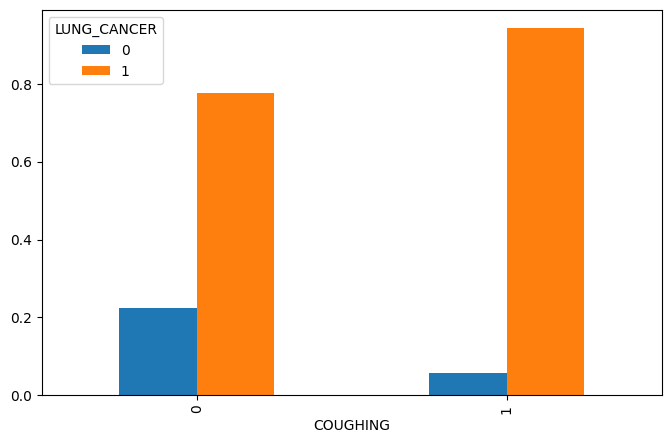

In [ ]:
plot('COUGHING')

<Axes: xlabel='SHORTNESS OF BREATH'>

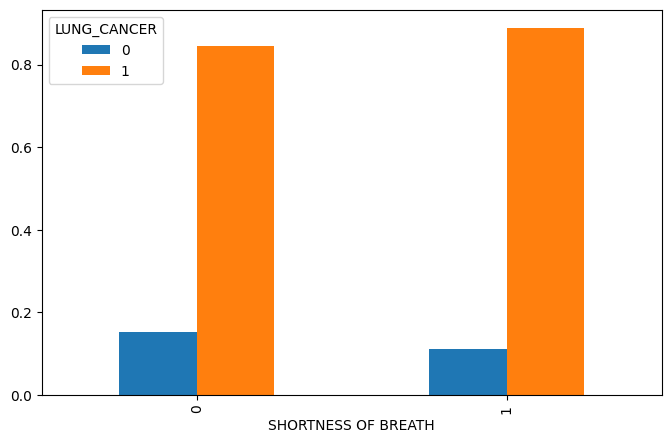

In [ ]:
plot('SHORTNESS OF BREATH')

<Axes: xlabel='SWALLOWING DIFFICULTY'>

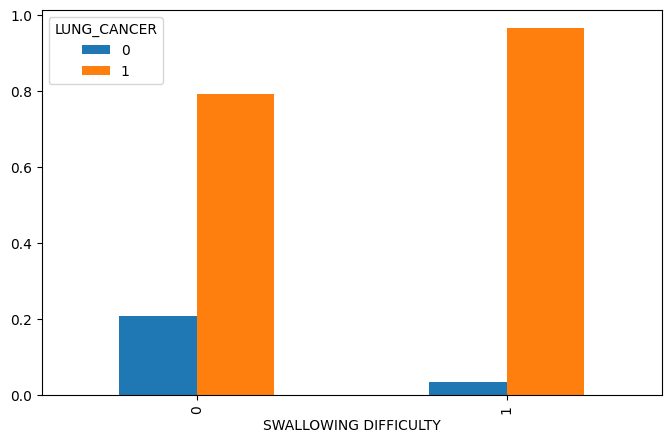

In [ ]:
plot('SWALLOWING DIFFICULTY')

<Axes: xlabel='CHEST PAIN'>

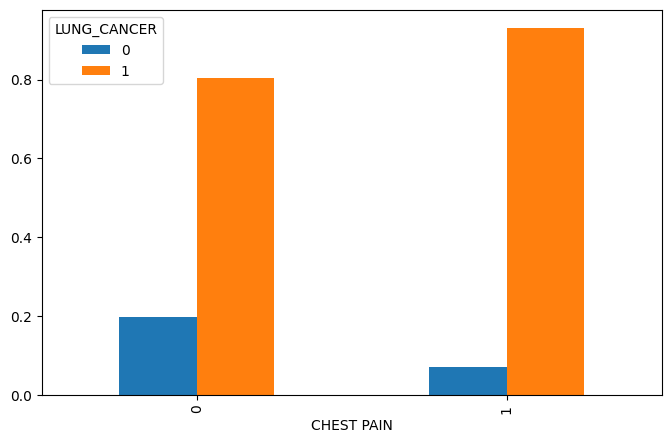

In [ ]:
plot('CHEST PAIN')

In [ ]:
X = df_new.drop('LUNG_CANCER', axis=1)
y = df_new['LUNG_CANCER']

In [ ]:
#lets balabnce the data
column_to_drop = ['AGE','ANXIETY', 'PEER_PRESSURE','CHRONIC DISEASE','GENDER']
df_new = new_file.drop(column_to_drop,axis=1)# axis is given becaues its to define row or column to drop 0 = rows , 1= columns
adaysn = ADASYN(random_state = 42)
X,y = adaysn.fit_resample(X,y)



In [ ]:
print(X,y)

     SMOKING  YELLOW_FINGERS  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0          0               1         1         0         1                  1   
1          1               0         1         1         0                  0   
2          0               0         1         0         1                  0   
3          1               1         0         0         0                  1   
4          0               1         0         0         1                  0   
..       ...             ...       ...       ...       ...                ...   
537        0               1         0         0         0                  0   
538        0               1         0         0         0                  0   
539        0               1         0         0         0                  0   
540        0               0         1         0         0                  0   
541        0               0         1         0         0                  0   

     COUGHING  SHORTNESS OF

In [ ]:
# implementing the model now
# splitting the data for traning test splitt
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#prdicting result using testing data
y_xgb_pred = xgb_model.predict(X_test)
y_xgb_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [ ]:
# lest see the accuracy
from sklearn.metrics import classification_report
xgb_acc = classification_report(y_test,y_xgb_pred)
print(xgb_acc)


              precision    recall  f1-score   support

           0       0.88      0.98      0.93        65
           1       0.98      0.87      0.93        71

    accuracy                           0.93       136
   macro avg       0.93      0.93      0.93       136
weighted avg       0.93      0.93      0.93       136



In [ ]:
# for detecting the

def get_user_input():
    """Gets user input for model features."""
    features = ['SMOKING', 'YELLOW_FINGERS', 'FATIGUE ', 'ALLERGY ',
                'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
                'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
    user_input = {}
    for feature in features:
        while True:
            try:
                value = int(input(f"Enter value for {feature} (0 or 1): "))
                if value in [0, 1]:
                    user_input[feature] = value
                    break
                else:
                    print("Invalid input. Please enter 0 or 1.")
            except ValueError:
                print("Invalid input. Please enter an integer.")
    return user_input

def predict_lung_cancer(user_input, model):
    """Predicts lung cancer based on user input and the trained model."""
    input_df = pd.DataFrame([user_input])
    prediction = model.predict(input_df)[0]
    return prediction

# Get user input
user_input = get_user_input()

# Make prediction using your trained model (xgb_model)
prediction = predict_lung_cancer(user_input, xgb_model)

# Display prediction
if prediction == 1:
    print("The model predicts a high risk of lung cancer.")
else:
    print("The model predicts a low risk of lung cancer.")

Enter value for SMOKING (0 or 1): 1
Enter value for YELLOW_FINGERS (0 or 1): 1
Enter value for FATIGUE  (0 or 1): 1
Enter value for ALLERGY  (0 or 1): 0
Enter value for WHEEZING (0 or 1): 1
Enter value for ALCOHOL CONSUMING (0 or 1): 1
Enter value for COUGHING (0 or 1): 1
Enter value for SHORTNESS OF BREATH (0 or 1): 1
Enter value for SWALLOWING DIFFICULTY (0 or 1): 0
Enter value for CHEST PAIN (0 or 1): 1
The model predicts a high risk of lung cancer.


In [ ]:
# saving the file trough pickel
filename = 'diagnosis_of_lung_cancer.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))
